In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
pollution = pd.read_csv('.//pollution_wide.csv')
pollution.head()

,city,year,month,day,CO,NO2,O3,SO2
0,Cincinnati,2012,1,1,0.245,20.0,0.030,4.20
1,Cincinnati,2012,1,2,0.185,9.0,0.025,6.35
2,Cincinnati,2012,1,3,0.335,31.0,0.025,4.25
3,Cincinnati,2012,1,4,0.305,25.0,0.016,17.15
4,Cincinnati,2012,1,5,0.345,21.0,0.016,11.05


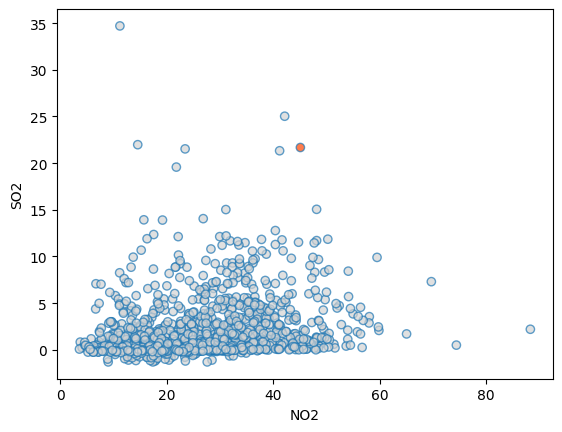

In [9]:
houston_pollution = pollution[pollution.city == 'Houston']

# Make array orangered for day 330 of year 2015, otherwise lightgray
houston_colors = ['orangered' if (day == 330) & (year == 2014) else 'lightgray'
                  for day, year in zip(houston_pollution.day, houston_pollution.year)]

sns.regplot(x = 'NO2',
           y='SO2',
           data=houston_pollution,
           fit_reg = False,
           # Send scatterplot argument to color points
           scatter_kws={'facecolors': houston_colors, 'alpha': 0.7});

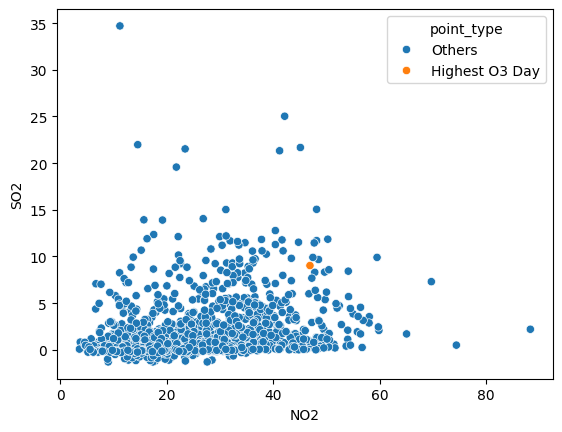

In [10]:
houston_pollution = pollution[pollution.city  ==  'Houston'].copy()
# Find the highest observed O3 value
max_O3 = houston_pollution.O3.max()

# Make a column that denotes which day had highest O3
houston_pollution['point_type'] = ['Highest O3 Day' if O3 == max_O3 
                                   else 'Others' for O3 in houston_pollution.O3]

# Encode the hue of the points with the O3 generated column
sns.scatterplot(x = 'NO2',
                y='SO2',
                hue='point_type',
               data = houston_pollution);
plt.show()

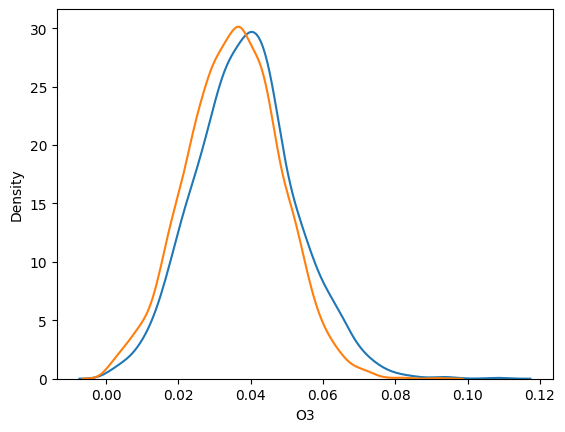

In [11]:
# Filter dataset to the year 2012
sns.kdeplot(pollution[pollution.year == 2012].O3, 
            # Shade under kde and add a helpful label
            # shade = True,
            label = '2012');

# Filter dataset to everything except the year 2012
sns.kdeplot(pollution[pollution.year != 2012].O3, 
            # Again, shade under kde and add a helpful label
            
            # shade = True,
            label = 'other years');

C:\Users\jdamodhar\AppData\Local\Temp\ipykernel_59012\3784026003.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pollution[pollution.city == 'Vandenberg Air Force Base'].O3,
C:\Users\jdamodhar\AppData\Local\Temp\ipykernel_59012\3784026003.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

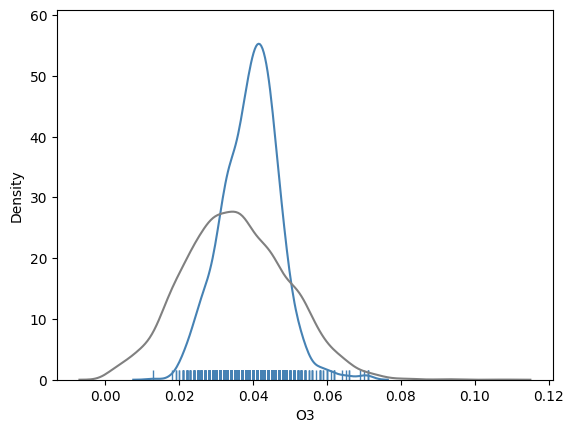

In [12]:
sns.distplot(pollution[pollution.city == 'Vandenberg Air Force Base'].O3, 
             label = 'Vandenberg', 
             # Turn of the histogram and color blue to stand out
             hist = False,
             color = 'steelblue', 
             # Turn on rugplot
             rug = True);

sns.distplot(pollution[pollution.city != 'Vandenberg Air Force Base'].O3, 
             label = 'Other cities',
             # Turn off histogram and color gray
             hist = False,  
             color = 'gray');

c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 9.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


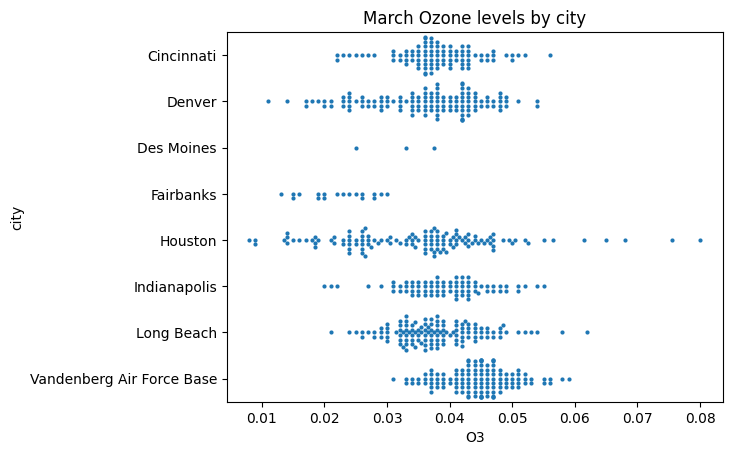

In [13]:
# Filter data to just March
pollution_mar = pollution[pollution.month == 3]

# Plot beeswarm with x as O3
sns.swarmplot(y = "city",
              x = 'O3', 
              data = pollution_mar, 
              # Decrease the size of the points to avoid crowding 
              size = 3);

# Give a descriptive title
plt.title('March Ozone levels by city');
plt.show()

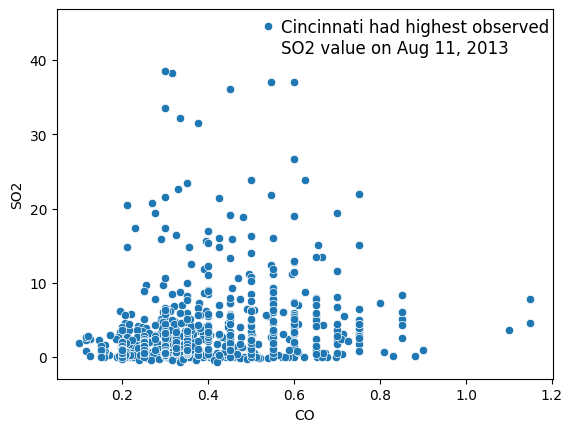

In [15]:
# Draw basic scatter plot of pollution data for August
sns.scatterplot(x = 'CO', y = 'SO2', data = pollution[pollution.month  ==  8]);

# Label highest SO2 value with text annotation
plt.text(0.57, 41,
         'Cincinnati had highest observed\nSO2 value on Aug 11, 2013', 
         # Set the font to large
         fontdict = {'ha': 'left', 'size': 'large'});

c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\text.py:1461: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(x))
c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\text.py:1463: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(y))


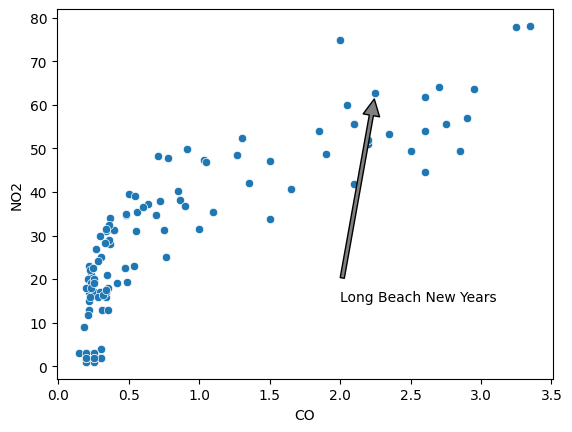

In [14]:
# Query and filter to New Years in Long Beach
jan_pollution = pollution.query("(month  ==  1) & (year  ==  2012)")
lb_newyears = jan_pollution.query("(day  ==  1) & (city  ==  'Long Beach')")

sns.scatterplot(x = 'CO', y = 'NO2',
                data = jan_pollution);

# Point arrow to lb_newyears & place text in lower left 
plt.annotate('Long Beach New Years',
             xy = (lb_newyears['CO'], lb_newyears['NO2']),
               xytext = (2, 15), 
             # Shrink the arrow to avoid occlusion
             arrowprops = {'facecolor':'gray', 'width': 3, 'shrink': 0.03},
             backgroundcolor = 'white');

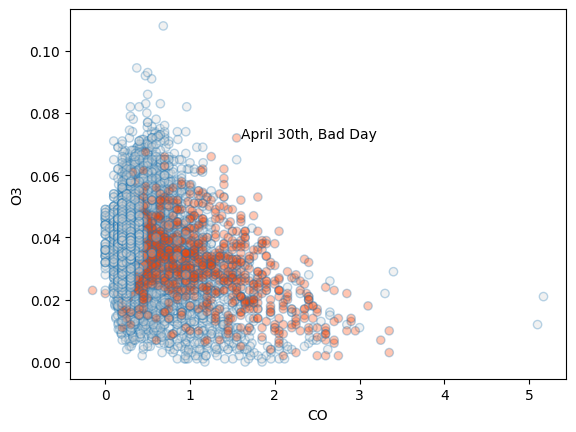

In [16]:
# Make a vector where Long Beach is orangered; else lightgray
is_lb = ['orangered' if city  ==  'Long Beach' else 'lightgray' for city in pollution['city']]

# Map facecolors to the list is_lb and set alpha to 0.3
sns.regplot(x = 'CO',
            y = 'O3',
            data = pollution,
            fit_reg = False, 
            scatter_kws = {'facecolors':is_lb, 'alpha':0.3});

# Add annotation to plot
plt.text(1.6, 0.072, 'April 30th, Bad Day');